In [75]:
import numpy as np
import matplotlib.pyplot as plt
import json
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import transforms
from torchvision.models import resnet50
from torchvision.utils import save_image
from PIL import Image
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [76]:
with open("imagenet_class_index.json") as f:
    imagenet_classes = {int(i):x[1] for i,x in json.load(f).items()}

moped
1.3236918449401855
True class probability: 0.26615089178085327
0 -2.8519086837768555
20 -24.314037322998047


KeyboardInterrupt: 

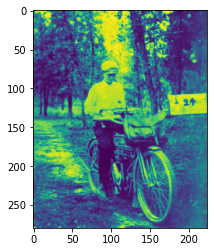

In [77]:
with torch.cuda.device(0):
    preprocess = transforms.Compose([
        transforms.Resize(224),
        transforms.ToTensor(),

    ])
    test_img = Image.open("test1.jpg")
    test_tensor = preprocess(test_img)[None,:,:,:]
    plt.imshow(test_tensor[0].numpy().transpose(1,2,0))
    class Normalize(nn.Module):
        def __init__(self, mean, std):
            super(Normalize, self).__init__()
            self.mean = torch.Tensor(mean)
            self.std = torch.Tensor(std)
        def forward(self, x):
            return ((x - self.mean.type_as(x)[None,:,None,None])/self.std.type_as(x)[None,:,None,None])

    norm = Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    model = resnet50(pretrained = True)
    model.eval()
    pred = model(norm(test_tensor))
    target = torch.LongTensor([665])
    target2 = torch.LongTensor([671])
    print(imagenet_classes[pred.max(dim=1)[1].item()])
    print(nn.CrossEntropyLoss()(pred,target).item())
    print("True class probability:", nn.Softmax(dim=1)(pred)[0,665].item())

    epsilon = 2./255
    delta = torch.zeros_like(test_tensor, requires_grad = True)
    opt = optim.SGD([delta], lr = 1e-1)

    for t in range(2000):
        pred = model(norm(test_tensor+delta))
        loss = -(nn.CrossEntropyLoss()(pred,target2)+nn.CrossEntropyLoss()(pred,target))
        if t % 20 == 0:
            print(t, loss.item())
        opt.zero_grad()
        loss.backward()
        opt.step()
        delta.data.clamp_(-epsilon,epsilon)
    print("True class probability:", nn.Softmax(dim=1)(pred)[0,665].item())
    max_class = pred.max(dim=1)[1].item()
    print("Predicted class: ", imagenet_classes[max_class])
    print("Predicted probability:", nn.Softmax(dim=1)(pred)[0,max_class].item())
    save_image((test_tensor+delta), "att_test1.jpg")

tripod
1.2951228618621826
True class probability: 0.2738642394542694
0 -1.2951228618621826
20 -29.611377716064453
40 -35.483192443847656
60 -31.403051376342773
80 -28.647031784057617
True class probability: 9.916188963704498e-13
Predicted class:  shovel
Predicted probability: 0.9998753070831299
parking_meter
1.4752739667892456
True class probability: 0.22871606051921844
0 -1.4752739667892456
20 -34.36592483520508
40 -26.106731414794922
60 -31.86429214477539
80 -29.86728286743164
True class probability: 6.4426892640301325e-12
Predicted class:  miniature_schnauzer
Predicted probability: 0.8995292782783508
parking_meter
2.175079822540283
True class probability: 0.11359909921884537
0 -2.175079822540283
20 -29.664243698120117
40 -31.602760314941406
60 -32.358367919921875
80 -28.370540618896484
True class probability: 6.834510857443529e-16
Predicted class:  jeep
Predicted probability: 0.9999997615814209
horse_cart
0.9257802963256836
True class probability: 0.3962221145629883
0 -0.92578029632

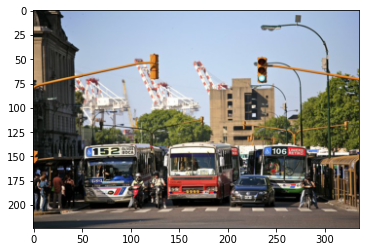

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import json
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import os,sys
from torchvision import transforms
from torchvision.models import resnet50
from torchvision.utils import save_image
from PIL import Image
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
with open("imagenet_class_index.json") as f:
    imagenet_classes = {int(i):x[1] for i,x in json.load(f).items()}
directory = os.getcwd() + "/New Test"

with torch.cuda.device(0):
    preprocess = transforms.Compose([
        transforms.Resize(224),
        transforms.ToTensor(),

    ])
    class Normalize(nn.Module):
        def __init__(self, mean, std):
            super(Normalize, self).__init__()
            self.mean = torch.Tensor(mean)
            self.std = torch.Tensor(std)
        def forward(self, x):
            return ((x - self.mean.type_as(x)[None,:,None,None])/self.std.type_as(x)[None,:,None,None])
    model = resnet50(pretrained = True)
    model.eval()
    sys.path.append(directory)
    for file in os.listdir(directory):
        #file = "test" + str(i) + ".jpg"
        test_img = Image.open("New Test/"+file)
        test_tensor = preprocess(test_img)[None,:,:,:]
        plt.imshow(test_tensor[0].numpy().transpose(1,2,0))
        norm = Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        pred = model(norm(test_tensor))
        idx = pred.max(dim=1)[1].item()
        target = torch.LongTensor([idx])
        print(imagenet_classes[idx])
        print(nn.CrossEntropyLoss()(pred,target).item())
        print("True class probability:", nn.Softmax(dim=1)(pred)[0,idx].item())
        epsilon = 2./255
        delta = torch.zeros_like(test_tensor, requires_grad = True)
        opt = optim.SGD([delta], lr = 1e-1)
        for t in range(100):
            pred = model(norm(test_tensor+delta))
            loss = -(nn.CrossEntropyLoss()(pred,target))
            if t % 20 == 0:
                print(t, loss.item())
            opt.zero_grad()
            loss.backward()
            opt.step()
            delta.data.clamp_(-epsilon,epsilon)
        print("True class probability:", nn.Softmax(dim=1)(pred)[0,idx].item())
        max_class = pred.max(dim=1)[1].item()
        print("Predicted class: ", imagenet_classes[max_class])
        print("Predicted probability:", nn.Softmax(dim=1)(pred)[0,max_class].item())
        save_image((test_tensor+delta), "attacked_" + file)

In [6]:
with torch.cuda.device(0):
    preprocess = transforms.Compose([
        transforms.Resize(224),
        transforms.ToTensor(),

    ])
    class Normalize(nn.Module):
        def __init__(self, mean, std):
            super(Normalize, self).__init__()
            self.mean = torch.Tensor(mean)
            self.std = torch.Tensor(std)
        def forward(self, x):
            return ((x - self.mean.type_as(x)[None,:,None,None])/self.std.type_as(x)[None,:,None,None])
    model = resnet50(pretrained = True)
    model.eval()
    for i in range(1,6):
        file = "test" + str(i) + ".jpg"
        test_img = Image.open(file)
        test_tensor = preprocess(test_img)[None,:,:,:]
        plt.imshow(test_tensor[0].numpy().transpose(1,2,0))
        norm = Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        pred = model(norm(test_tensor))
        idx = pred.max(dim=1)[1].item()
        target = torch.LongTensor([idx])
        print(imagenet_classes[idx])
        print(nn.CrossEntropyLoss()(pred,target).item())
        print("True class probability:", nn.Softmax(dim=1)(pred)[0,idx].item())
        epsilon = 2./255
        delta = torch.zeros_like(test_tensor, requires_grad = True)
        opt = optim.SGD([delta], lr = 1e-1)
        for t in range(100):
            pred = model(norm(test_tensor+delta))
            loss = -(nn.CrossEntropyLoss()(pred,target))
            if t % 20 == 0:
                print(t, loss.item())
            opt.zero_grad()
            loss.backward()
            opt.step()
            delta.data.clamp_(-epsilon,epsilon)
        print("True class probability:", nn.Softmax(dim=1)(pred)[0,idx].item())
        max_class = pred.max(dim=1)[1].item()
        print("Predicted class: ", imagenet_classes[max_class])
        print("Predicted probability:", nn.Softmax(dim=1)(pred)[0,max_class].item())
        save_image((test_tensor+delta), "att_" + "test" + str(i) + ".jpg")